# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import shuffle

In [0]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [0]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [6]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [8]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

In [0]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (dim,1) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim, dtype=float)
    #print(w)
    b = 0
    return w,b

In [11]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


In [0]:
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return (1 / (1 + math.exp(-z)))

#return 1 / (1 + np.exp(-z))

In [0]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sum_ = 0.0;
    
    for i  in range(0,len(y_true)):
      y= y_true[i]
      y_pre = y_pred[i]
      try:
        err = ( (y* math.log( y_pre ,10)) + ((1-y) * math.log( 1-y_pre ,10 ) ) );
        sum_ = sum_ + err
      except:
        #math domain error
        err = 1
      loss = ((-1) / len(y_true)) * sum_
      
    return loss

In [16]:
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
logloss(true,pred) # logloss = 0.07644900402910387

0.07644900402910387

In [0]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    
    dw = x*(y-sigmoid(np.dot(w,x)+b) -(alpha/N)*w)

    return dw

In [0]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     y_pred =  sigmoid( np.dot(w,x) + b )
     db = y - y_pred
     return db

In [0]:
def train(X_tr ,y_tr ,X_test,y_test,epochs,alpha,eta0 , batch_size ):
    ''' In this function, we will implement logistic regression'''
    #
    w , b = initialize_weights(X_tr[0])
    W_new = w
    b_new = b
    N = len( X_tr )
    epoch_loss_list = []
    epoch_test_loss_list = []
    
    for e in range(epochs):
        
        #for every point
        for  indx , point in enumerate( X_tr ):
          X = X_tr[ indx : indx + 1]
          Y = y_tr[ indx : indx + 1]
          
          #compute gradient w.r.to w
          dw = gradient_dw( X[0] , Y , W_new ,  b_new  , alpha , N )
          #compute gradient w.r.to b
          db = gradient_db( X[0] , Y , W_new ,  b_new  )

          # to update weights
          W_new = W_new + ( eta0 * dw )
          # to update intercept
          b_new = b_new + ( eta0 *  db  )
        
        #predict y using w,b
        y_predicted = []
        for point_x in X_tr:
          y_predicted.append( sigmoid(np.dot( W_new , point_x  ) + b_new ))
        #compute the loss between predicted and actual values
        epoch_loss = logloss( y_tr , np.array(y_predicted) )
        # store all the train loss
        epoch_loss_list.append( epoch_loss )

        #predict y_test using w,b
        y_test_predicted = []
        for point_test in X_test:
          y_test_predicted.append( sigmoid(np.dot( W_new , point_test  ) + b_new ))
        #compute the loss between predicted and actual values
        epoch_loss_te = logloss( y_test , y_test_predicted )
        # store all the test loss
        epoch_test_loss_list.append( epoch_loss_te )

    return W_new , b_new , epoch_loss_list , epoch_test_loss_list

In [88]:
alpha=0.0001
eta0=0.0001

e = 10
epochs = [1+i for i in range(e)]
batch_size = 1

#To compute weights , intercept and log loss for train data
weights_updated , b_updated, log_loss ,log_loss_test = train(X_train,y_train,X_test,y_test, e ,alpha,eta0 , batch_size )

w = weights_updated 
b = b_updated
#b_updated = intercept
weights_updated , b_updated 

(array([-0.42320237,  0.19097504, -0.14588903,  0.33813462, -0.21204108,
         0.56528022, -0.44537758, -0.09169275,  0.21798654,  0.16980148,
         0.19524869,  0.00226124, -0.0778474 ,  0.33881858,  0.02215503]),
 array([-0.85059128]))

In [95]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
#w = custom computed weights , b = custom computed intercept
#clf.coef_ = sklearn weights , b-clf.intercept_ = sklearn intercept
w-clf.coef_, b-clf.intercept_

(array([[ 0.00016455,  0.00549939,  0.00270133, -0.00330945, -0.00385437,
          0.00511443,  0.00704724,  0.00239538,  0.00871335, -0.01103978,
         -0.00180321, -0.00195792,  0.0017563 ,  0.00029056, -0.00051218]]),
 array([0.00254701]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

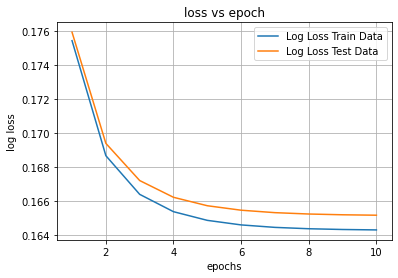

In [96]:
from matplotlib import pyplot as plt

plt.plot( np.array( epochs) , np.array( log_loss ) ,label="Log Loss Train Data");
plt.plot( np.array( epochs) , np.array( log_loss_test ) ,label="Log Loss Test Data");

plt.title("loss vs epoch")
plt.xlabel("epochs")
plt.ylabel("log loss")
plt.grid("whitegrid")
plt.legend()
plt.show();

In [91]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(X[i] , w )+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9553333333333334
0.95288
